Blasius Equation - Apresentação 10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.optimize

In [ ]:
#d2u/dx2 = -\epsilon*du/dx
#u(0) = 0
#u(1) = 1

In [ ]:
#

#(u)' = u'
#(u')' = -eps*u'

eps = 0.1
def rhs_ode(t, uvec):
    u, du = uvec[0], uvec[1]
    return np.array([du, -eps*du])

def solve_ivp(u0, du0):
    uvec0 = np.array([u0, du0])
    t_span = [0, 1]
    sol = scipy.integrate.solve_ivp(rhs_ode, t_span, uvec0)
    sol_at_b = sol.y[0, -1]
    return sol, sol_at_b

def g(gamma):
    return solve_ivp(0.0, gamma)[1] - 1

In [ ]:
gamma = scipy.optimize.bisect(g, 0.5, 2.0)

In [ ]:
sol, _ = solve_ivp(0, gamma)

In [ ]:
t = sol.t
u = sol.y[0]
du = sol.y[1]

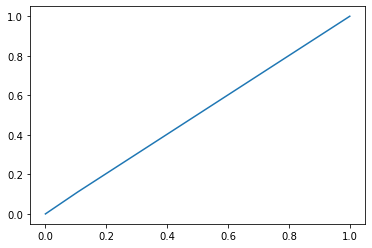

In [ ]:
plt.plot(t, u)

In [ ]:
#SOLUTION TO THE BLASIUS PROBLEM
#f''' + 1/2*f*f'' = 0
#f(0) = 0
#f'(0) = 0
#f'(\infty) = 1
#Here, we consider $\infty = 10$.

def rhs_ode_blasius(t, uvec):
    u, du, ddu = uvec[0], uvec[1], uvec[2]
    return np.array([du, ddu, -u*ddu/2])

def solve_ivp_blasius(u0, du0, ddu0):
    uvec0 = np.array([u0, du0, ddu0])
    t_span = [0, 10]
    sol = scipy.integrate.solve_ivp(rhs_ode_blasius,
                                    t_span,
                                    uvec0,
                                    t_eval=np.linspace(t_span[0],
                                                       t_span[1]))
    du0_at_10 = sol.y[1, -1]
    return sol, du0_at_10

def g(gamma):
    u0 = 0
    du0 = 0
    return solve_ivp_blasius(u0, du0, gamma)[1] - 1

In [ ]:
gamma = scipy.optimize.bisect(g, 0.0, 2.0)

In [ ]:
sol = solve_ivp_blasius(0, 0, gamma)[0]

Text(0.5, 1.0, 'Solution of the Blasius problem')

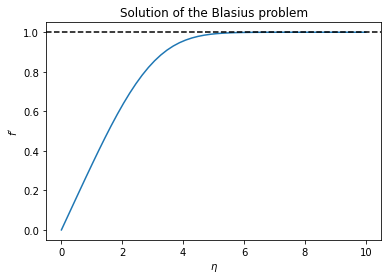

In [ ]:
t = sol.t
f = sol.y[0, :]
df = sol.y[1, :]
d2f = sol.y[2, :]
plt.plot(t, df)
plt.axhline(1, color='black', linestyle='--')
plt.xlabel(r"$\eta$")
plt.ylabel(r"$f'$")
plt.title("Solution of the Blasius problem")